In [1]:
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import scipy
import dill #This will be used to store the workplace so you dont have to run certain cells
sns.set()
import os 
from math import nan

def proportion(traj):  
    
    contact=150
    yvals=traj

    higher=np.nansum(yvals<contact)
    denom=np.nansum(yvals<contact*50000)
    
    New_Traj=higher/denom
    return New_Traj

<h2> Generate 'corrected traces' </h2> 

In [2]:
#Use the same values as before when applying the method
sizerstart=0
sizer=1390
sizerend=1390
numb_of_loci=42
Data_Folder=''
sig=100

Working_on='Trajectories_Error_X_129_N100nm/'

X_Trajectories=np.zeros([sizer, numb_of_loci])*nan
for i in range(sizer):
    
    Counter=i+1
    file=Data_Folder+Working_on+str(Counter)+'.npy'
    Traj=np.load(file)
    X_Trajectories[i,:]=Traj[0:numb_of_loci]


    
for loci_i in np.arange(0, numb_of_loci, 1):
    
        loci=loci_i
        
        file=Data_Folder+Working_on+'dataNoise_store'+str(sizerstart)+'_'+str(sig)+'_'+str(sizerend)+'_'+str(sizer)+'_'+str(loci)+'_'+str(numb_of_loci)+'.npy'
        dataNoise = np.load(file)
        X_Trajectories[:,loci_i]=X_Trajectories[:,loci_i]+dataNoise
        
        

try: 
    os.makedirs(Data_Folder+'Corrected_Trajectories_True_X_'+str(sig)) 
except:
    print('Folder is allready there!')


for i in range(sizer):
    file=Data_Folder+'Corrected_Trajectories_True_X_'+str(sig)+'/'+str(i+1)+'.npy'
    np.save(file, X_Trajectories[i,:])
    
    

<h2> Lets quickly look at overall error </h2> 

In [30]:
#you can look at different sigs easy
sig=100
Working_on='Trajectories_Error_X_129_N100nm/'
Corrected='Corrected_Trajectories_True_X_'+str(sig)+'/'
Ground_True='Ground_Truth_Trajectories_True_X_129/'

X_Trajectories_Raw_Error=np.zeros([sizer, numb_of_loci])*nan
X_Trajectories_Corrected_Error=np.zeros([sizer, numb_of_loci])*nan
for i in range(sizer):
    
    Counter=i+1
    file=Data_Folder+Working_on+str(Counter)+'.npy'
    Traj=np.load(file)
    file=Data_Folder+Ground_True+str(Counter)+'.npy'
    Traj2=np.load(file)
    X_Trajectories_Raw_Error[i,:]=Traj-Traj2
    
    file=Data_Folder+Corrected+str(Counter)+'.npy'
    Traj=np.load(file)
    file=Data_Folder+Ground_True+str(Counter)+'.npy'
    Traj2=np.load(file)
    X_Trajectories_Corrected_Error[i,:]=Traj-Traj2
        
        
        
        

Average Error Before Method (nm): 79.87861514007083
Average Error After Method (nm): 61.25885575090109


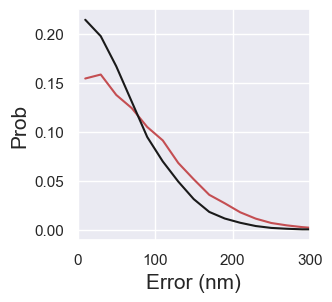

In [31]:
rel=np.abs(np.matrix.flatten(X_Trajectories_Raw_Error))
print('Average Error Before Method (nm):', np.nanmean(rel))
hist_raw, bin_edges = np.histogram(rel,np.arange(0,500,20), density=True)
rel=np.abs(np.matrix.flatten( X_Trajectories_Corrected_Error))
hist_cor, bin_edges = np.histogram(rel,np.arange(0,500,20), density=True)
print('Average Error After Method (nm):', np.nanmean(rel))
fig=plt.figure()
# plt.plot(bin_edges[0:-1], (hist)/np.sum(hist),'m')
plt.plot(bin_edges[0:-1]+10, (hist_raw)/np.sum(hist_raw),'r')
plt.plot(bin_edges[0:-1]+10, (hist_cor)/np.sum(hist_cor),'k')

fig.set_size_inches(3,3)
plt.xlim(0, 300)
plt.ylabel('Prob',fontsize=15)
plt.xlabel('Error (nm)',fontsize=15)
fig.set_size_inches(3,3)
fig.set_facecolor("white")


<h2> Now the contact frequency </h2>

In [45]:
# #First we are going to go through the whole of the trajectories and quantify the distances
#you can look at different sigs easy
numb_of_loci=42
Data_Folder=''
sig=100
Working_on='Trajectories_Error_X_129_N100nm/'
Corrected='Corrected_Trajectories_True_X_'+str(sig)+'/'
Ground_True='Ground_Truth_Trajectories_True_X_129/'

X_Trajectories_true=np.zeros([sizer, numb_of_loci])*nan
X_Trajectories_raw=np.zeros([sizer, numb_of_loci])*nan
X_Trajectories_cor=np.zeros([sizer, numb_of_loci])*nan

for i in range(sizer):
    Counter=i+1
    
    
    file=Data_Folder+Ground_True+str(Counter)+'.npy'
    Traj=np.load(file)
    file=Data_Folder+Working_on+str(Counter)+'.npy'
    Traj2=np.load(file)
    file=Data_Folder+Corrected+str(Counter)+'.npy'
    Traj3=np.load(file)
    
    
    X_Trajectories_true[i,:]=(Traj[0:numb_of_loci])
    X_Trajectories_raw[i,:]=(Traj2[0:numb_of_loci])
    X_Trajectories_cor[i,:]=(Traj3[0:numb_of_loci])


Distances_true={}
Distances_raw={}
Distances_cor={}

for loci_i in np.arange(0, numb_of_loci, 1):
    for loci_j in np.arange(0, numb_of_loci, 1):
       
            X_Displacements=X_Trajectories_true[:,loci_i]-X_Trajectories_true[:,loci_j]
            Distances_true[loci_i, loci_j]=(X_Displacements**2)**.5
            
            X_Displacements=X_Trajectories_raw[:,loci_i]-X_Trajectories_raw[:,loci_j]
            Distances_raw[loci_i, loci_j]=(X_Displacements**2)**.5
            
            X_Displacements=X_Trajectories_cor[:,loci_i]-X_Trajectories_cor[:,loci_j]
            Distances_cor[loci_i, loci_j]=(X_Displacements**2)**.5

In [46]:
contact_true=np.zeros([numb_of_loci,numb_of_loci])*nan
contact_raw=np.zeros([numb_of_loci,numb_of_loci])*nan
contact_cor=np.zeros([numb_of_loci,numb_of_loci])*nan

for loci_i in np.arange(0, numb_of_loci, 1):
    for loci_j in np.arange(0, numb_of_loci, 1):
        
            contact_true[loci_i, loci_j]=proportion(Distances_true[loci_i, loci_j])
            contact_raw[loci_i, loci_j]=proportion(Distances_raw[loci_i, loci_j])
            contact_cor[loci_i, loci_j]=proportion(Distances_cor[loci_i, loci_j])

/var/folders/kt/fz3jn40j3fs94gf_7pfhx25wb9vwf6/T/ipykernel_80542/44035776.py:28: RuntimeWarning: invalid value encountered in scalar divide
  New_Traj=higher/denom


(0.5, 1.0)

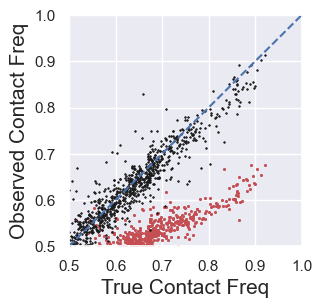

In [47]:
fig=plt.figure()

plt.plot(np.matrix.flatten(contact_true),np.matrix.flatten(contact_raw),'r.',markersize=2, label='No Method')


plt.plot(np.matrix.flatten(contact_true),np.matrix.flatten(contact_cor),'k.',markersize=1, label='Method')


#plt.title('Contact<'+str(cutoff)+' nm',fontsize=15)
plt.xlabel('True Contact Freq',fontsize=15)
plt.ylabel('Observed Contact Freq',fontsize=15)
plt.plot([0,1],[0,1],'--')
#fig.set_size_inches(3,3)

fig.set_size_inches(3,3)
#plt.legend()
plt.xlim(.5,1)
plt.ylim(.5,1)
#fig.savefig(Data_folder+"Figures/"+"contactfreq.png", dpi=300, bbox_inches='tight')
